# Correlation Meteo_Pollutants

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## 1. Tunning the dataset Meteo-Pollutants

In [2]:
df_metePol = pd.read_csv(r"C:\Users\sophi\FrMarques\LyonData WCS new\P3 wildAir\p3_WildAir\Open_Meteo_com\OpenMeteo_data\CSV\CSV_meteopollu_final\df_meteopolluLyon2124.csv")

In [3]:
print(df_metePol.shape)
display(df_metePol.head(3))
display(df_metePol.sample(2))
display(df_metePol.tail(3))

(1461, 14)


dateID    Temp_C  Humidity_%   rain_mm  Snowfall_cm  AtmoPressure_hPa  \
0  2021-01-01  2.599667   85.773796  0.075000     0.002917         988.10660   
1  2021-01-02  1.618417   79.047424  0.008333     0.023333         989.22394   
2  2021-01-03  1.016333   78.578060  0.000000     0.017500         991.02985   

   CloudCover_%  WindSpeed_kmh  WindDirection_360   NO2    O3  PM10  PM2.5  \
0     95.291664      12.806746          337.38327  71.0  58.3  24.2   24.2   
1     95.791664      20.723036          336.34866  46.0  49.8  23.2   16.4   
2     86.666664      11.569545          301.66028  77.5  49.8  57.3   55.9   

    SO2  
0   8.1  
1  31.4  
2   4.7

dateID   Temp_C  Humidity_%  rain_mm  Snowfall_cm  AtmoPressure_hPa  \
1457  2024-12-28 -0.09825   89.885376    0.000          0.0         1009.9365   
101   2021-04-12  6.61425   60.204998    0.025          0.0         1005.8911   

      CloudCover_%  WindSpeed_kmh  WindDirection_360   NO2    O3  PM10  PM2.5  \
1457     50.416668       1.143491          169.49090  75.0   5.7  71.2   55.6   
101      60.000000      21.171001          231.84233  83.7  86.7  34.9   14.7   

        SO2  
1457  235.0  
101    25.6

dateID    Temp_C  Humidity_%  rain_mm  Snowfall_cm  \
1458  2024-12-29 -1.177417   97.066895      0.0          0.0   
1459  2024-12-30 -1.248250   94.168620      0.0          0.0   
1460  2024-12-31 -0.817000   89.934456      0.0          0.0   

      AtmoPressure_hPa  CloudCover_%  WindSpeed_kmh  WindDirection_360   NO2  \
1458        1011.31660     94.166664       3.711657          333.32767  56.5   
1459        1012.07794    100.000000       2.209112          258.41135  64.9   
1460        1011.63837     61.708332       1.884526          164.20848  70.2   

        O3  PM10  PM2.5   SO2  
1458  20.4  43.7   33.5  31.4  
1459  23.0  40.7   25.6   8.6  
1460   6.6  49.0   38.3   3.3

### 1.1 Adjusting meteo columns to 2 decimal cases

In [4]:
########## List of numerical meteo columns to be adjusted:
col_meteo = ["Temp_C", "Humidity_%", "rain_mm", "Snowfall_cm", "AtmoPressure_hPa", "CloudCover_%", "WindSpeed_kmh", "WindDirection_360"]  # Ajusta conforme necessário

# Round up the columns to 2 decimal cases:
df_metePol[col_meteo] = df_metePol[col_meteo].round(2)


### 1.2 Setting "date" as index

In [5]:
############## Setting "Date" as the index of the dataset if it is not:
df_metePol.set_index('dateID', inplace=True)

# Setting the index ("Date") as "datetime" dtype:
df_metePol.index = pd.to_datetime(df_metePol.index)

### 1.3 Correlation Matrix

In [6]:
########## Setting up the correlation matrix (Pearson/Linear by default):
correlation = df_metePol.corr()


### 1.4 Heatmap

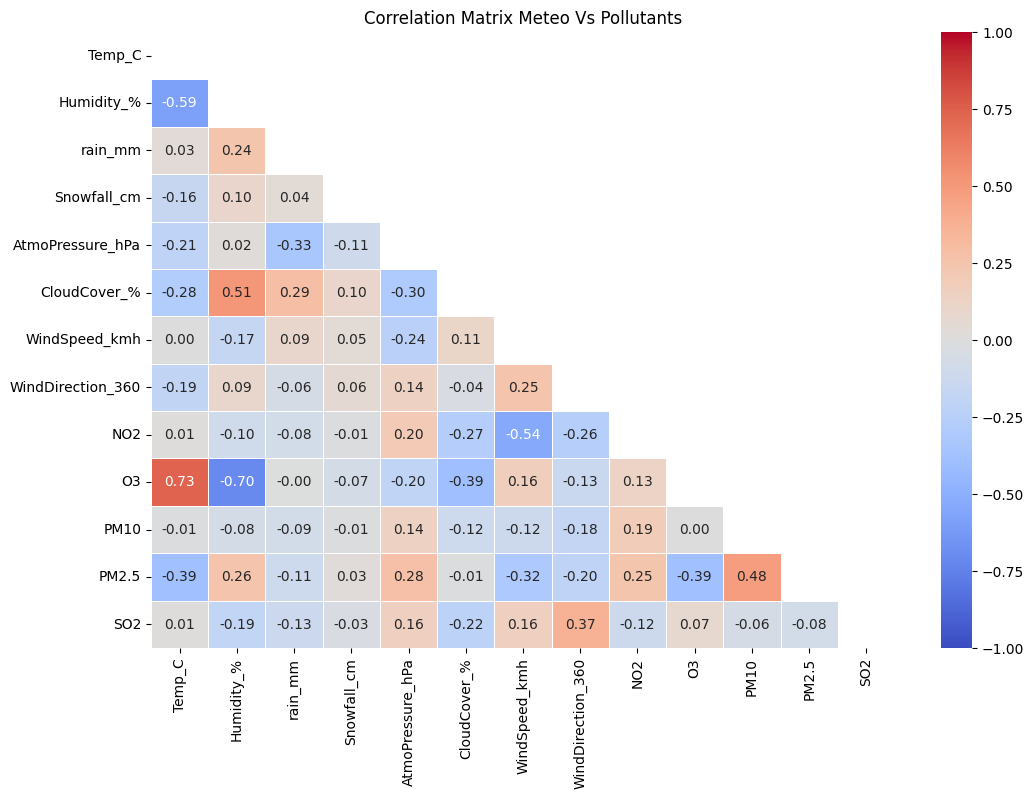

In [7]:
############ Setting up a mask for the Matrix to make it easier to read:
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Size of the figure frame:
plt.figure(figsize=(12, 8))

# Building the Seaborn heatmap:
sns.heatmap(
    correlation, 
    mask=mask,  # Apply the mask;
    annot=True,  # Show correlations values;
    fmt=".2f",  # Limiting the values to 2 decimal cases;
    cmap="coolwarm",  # The map colours (blue to red);
    linewidths=0.5,  # Adding lines to separate cells;
    vmin=-1, vmax=1  # Setting boundaries to the colour scale.
)

# Graph title:
plt.title("Correlation Matrix Meteo Vs Pollutants")
plt.show()

### 1.4 Scatter duels meteo vs. polutants

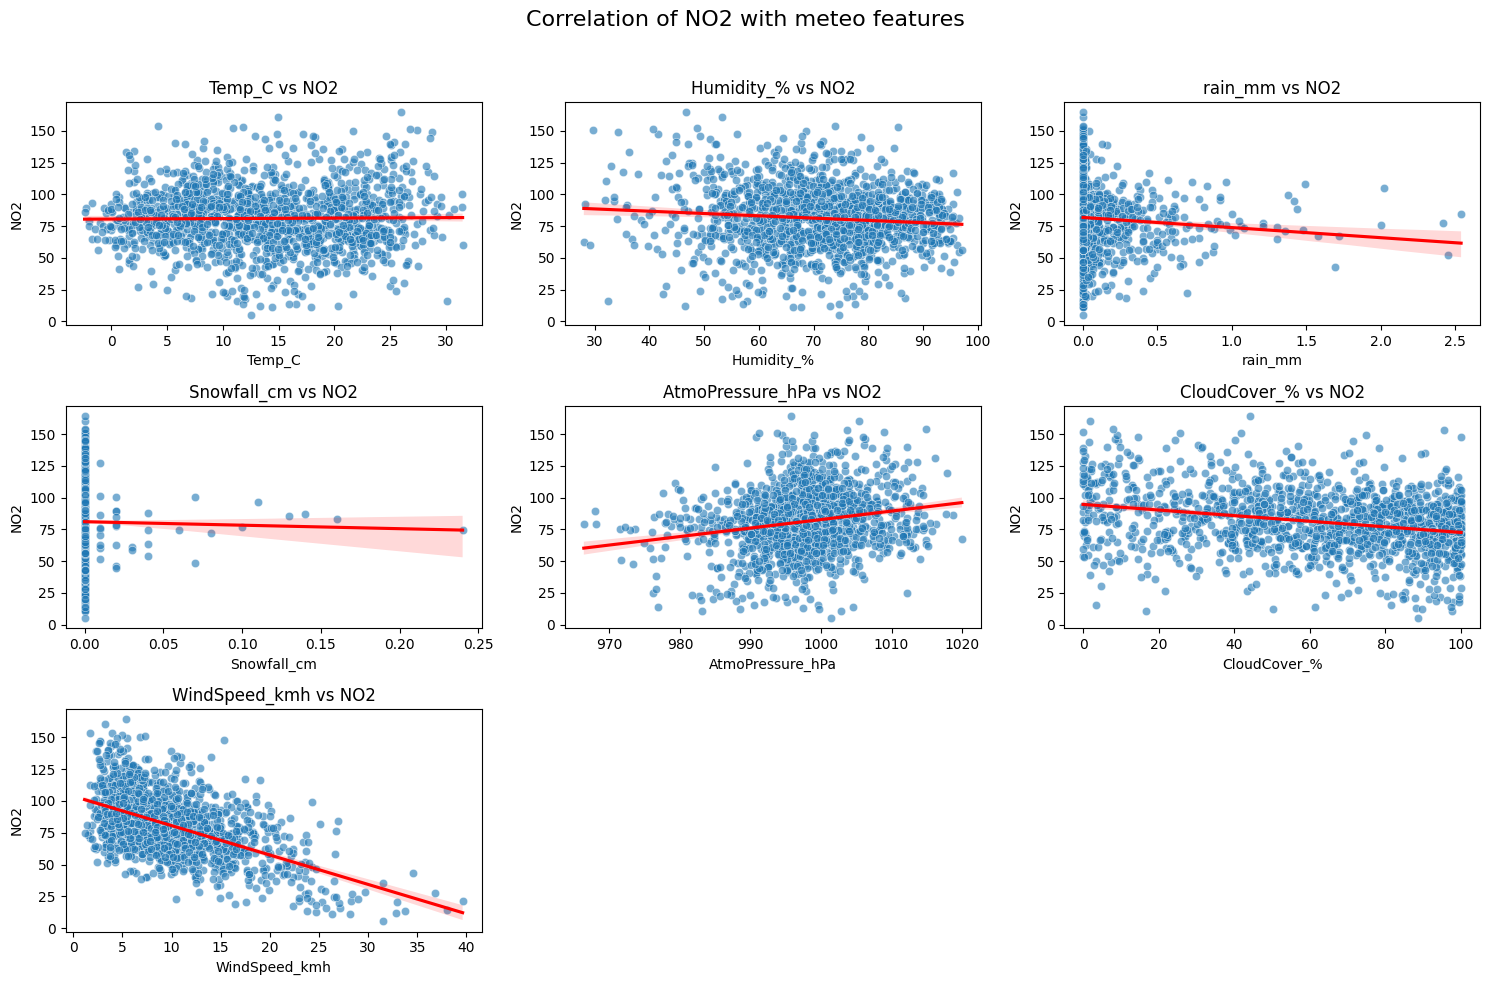

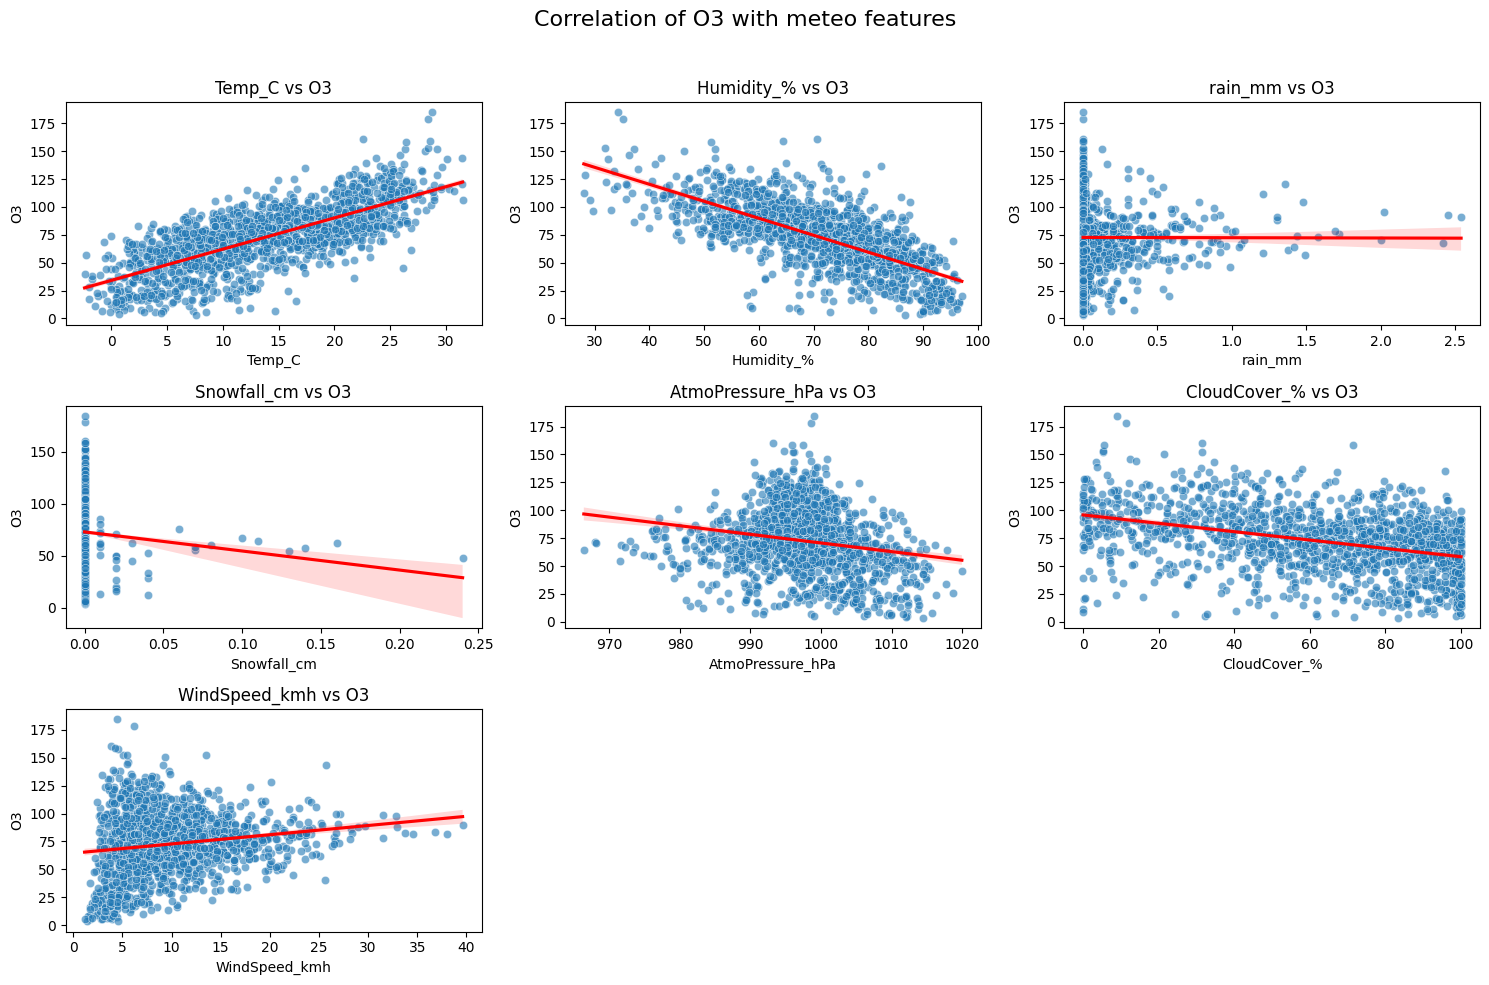

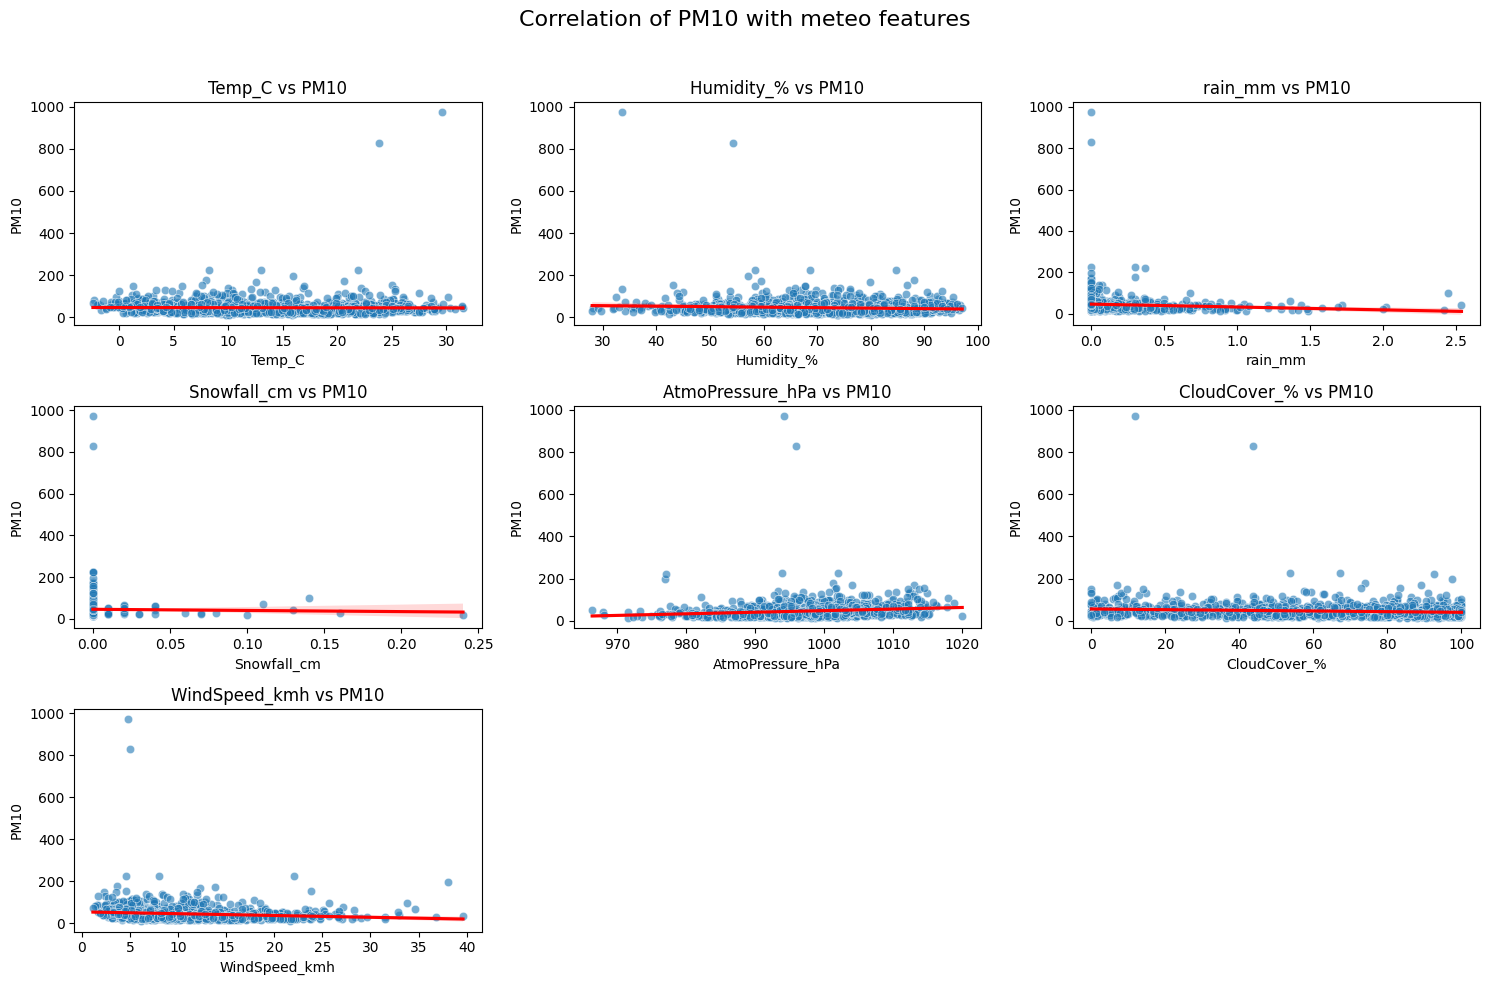

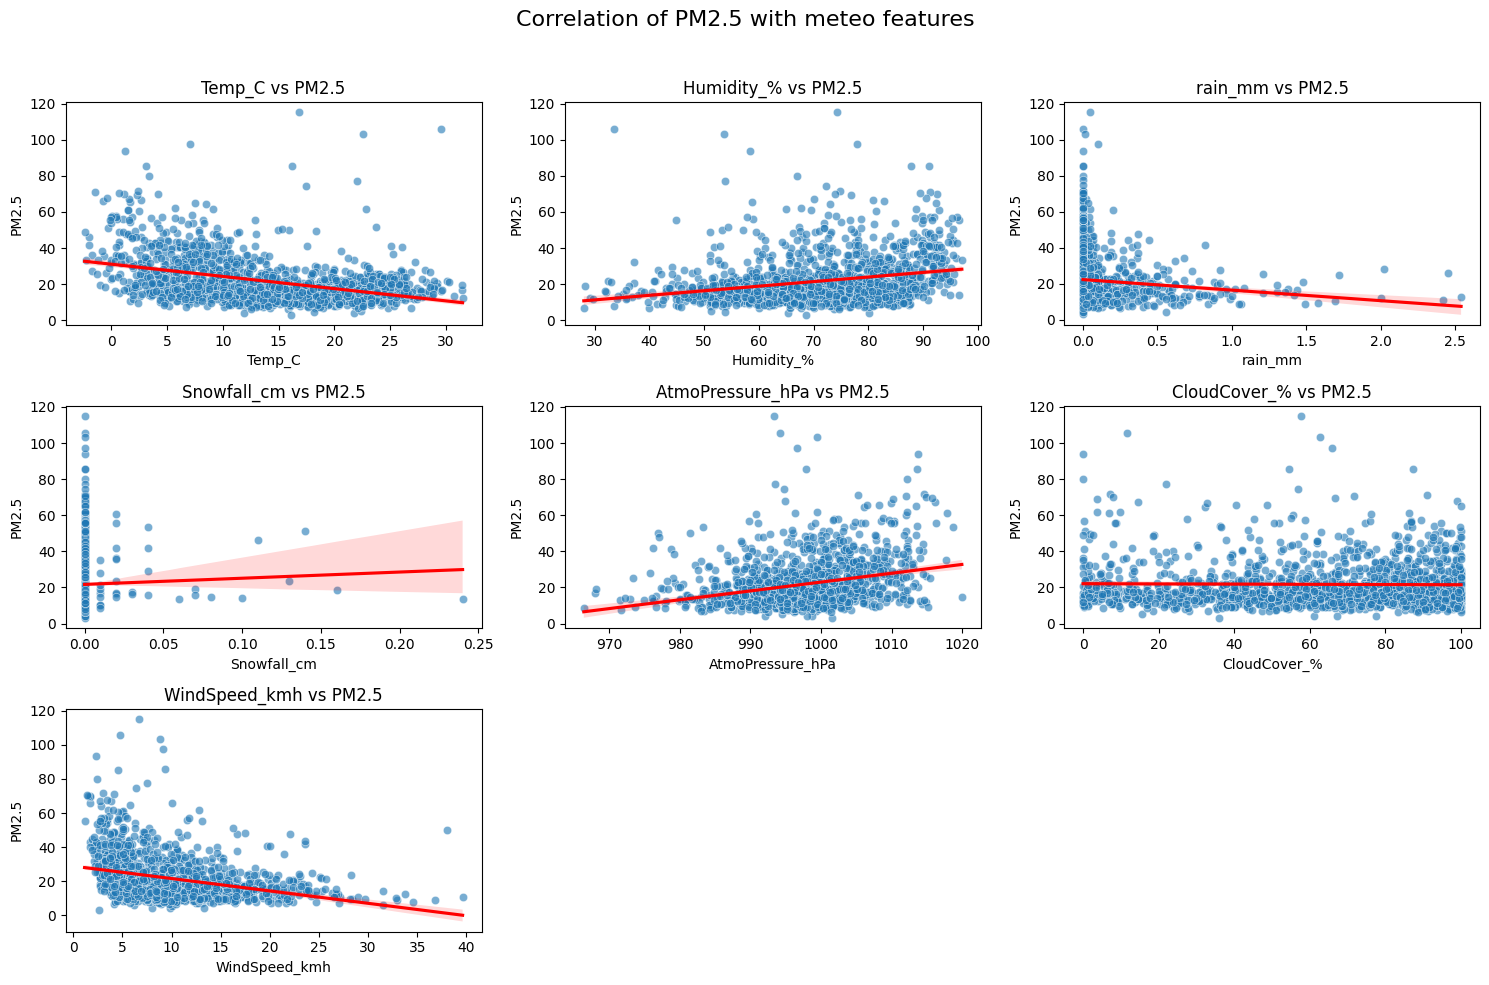

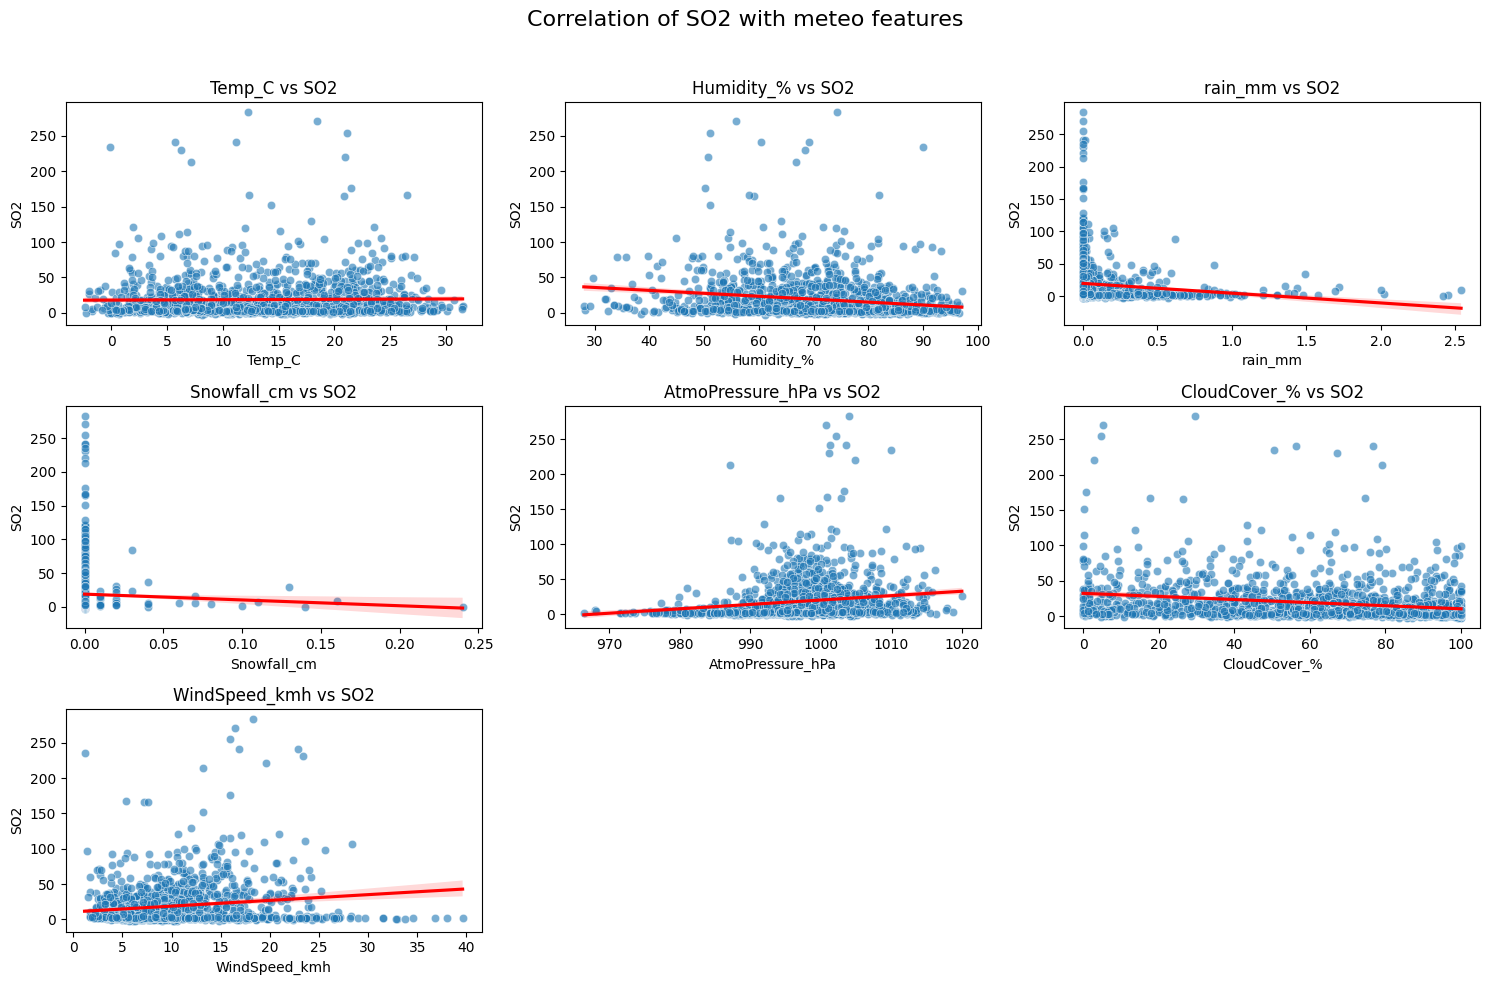

In [8]:
#### List of meteo features and the 5 pollutants under scope:
var_meteo = ['Temp_C', 'Humidity_%', 'rain_mm', 'Snowfall_cm', 'AtmoPressure_hPa', 
             'CloudCover_%', 'WindSpeed_kmh']
var_pol = ['NO2', 'O3', 'PM10', 'PM2.5', 'SO2']

# Setting the subplots for each pollutant to be correlated with each meteo feature:
for pollutant in var_pol:
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    fig.suptitle(f"Correlation of {pollutant} with meteo features", fontsize=16)
    
    for i, meteo in enumerate(var_meteo):
        ax = axes[i // 3, i % 3]  # Automatic positioning of subplots:
        
        # Defining "x" and "y" to ensure the same indexes/rows/entries:
        df_clean = df_metePol[[meteo, pollutant]].dropna()
        x = df_clean[meteo]
        y = df_clean[pollutant]
        
        # Setting the scatter plots
        sns.scatterplot(x=x, y=y, ax=ax, alpha=0.6)
        
        # Adding regression line to help the analysis:
        sns.regplot(x=x, y=y, ax=ax, scatter=False, line_kws={"color": "red"})
        
        # Adjusting titles and axes:
        ax.set_title(f"{meteo} vs {pollutant}")
        ax.set_xlabel(meteo)
        ax.set_ylabel(pollutant)
    
    # Removing empty axes if less than 9 graphs:
    for j in range(len(var_meteo), 9):
        fig.delaxes(axes[j // 3, j % 3])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()


### 1.5 Superposition of meteo features for each pollutant by year

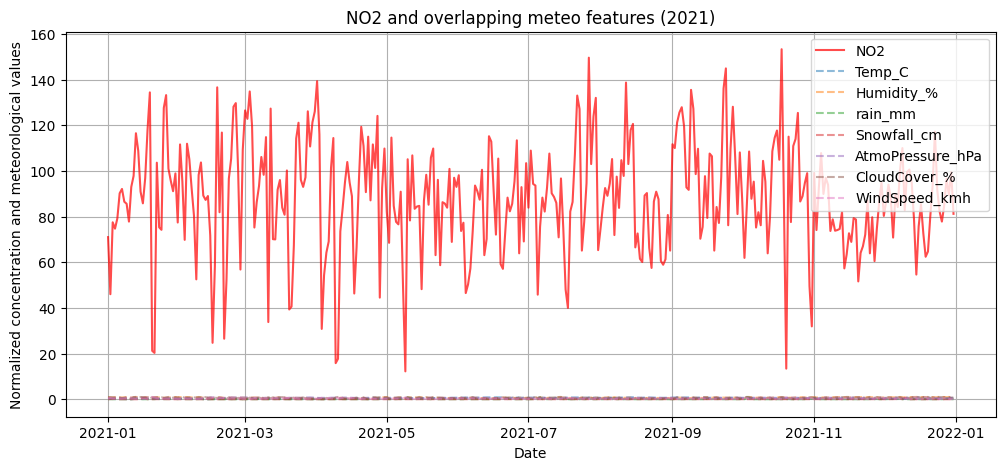

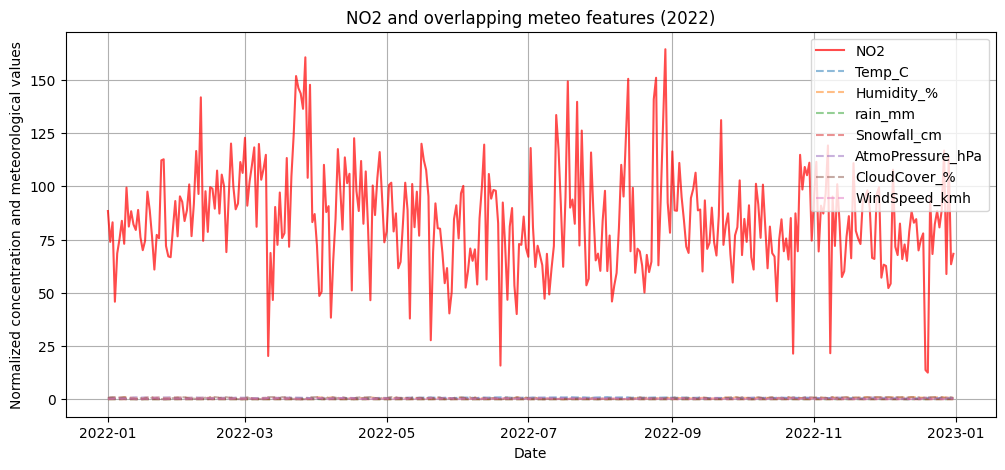

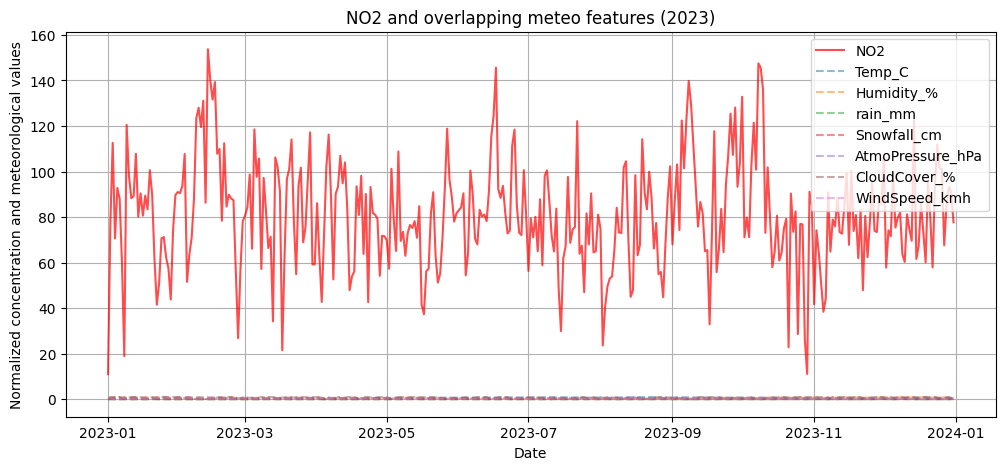

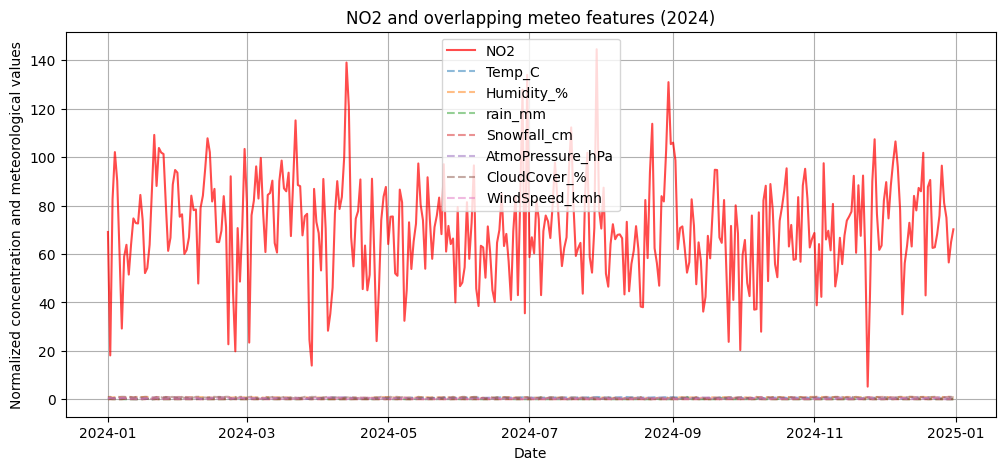

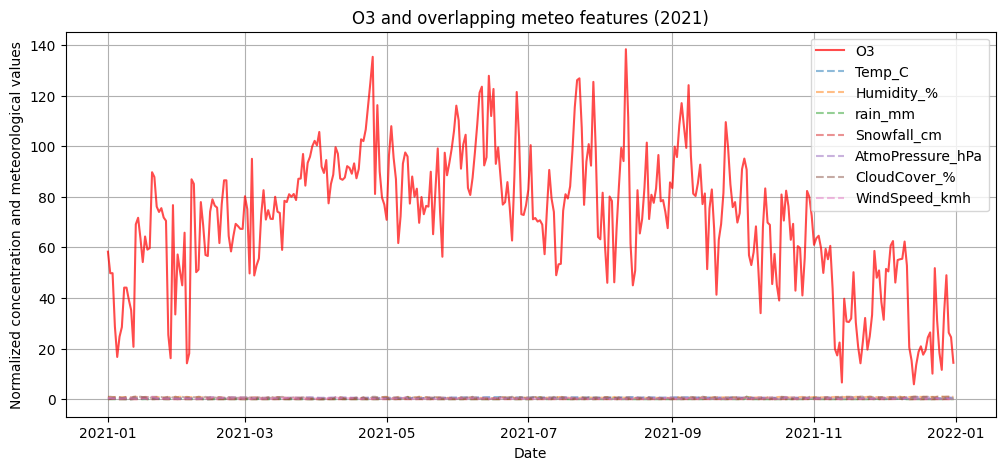

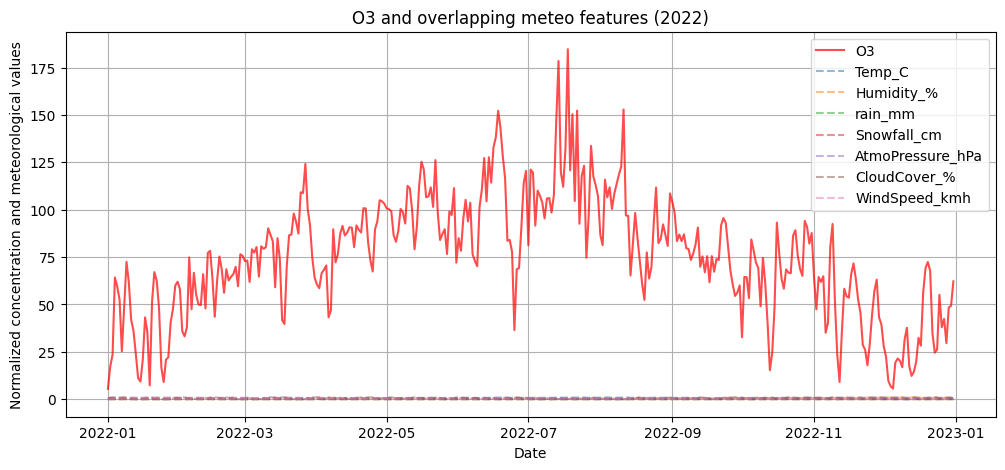

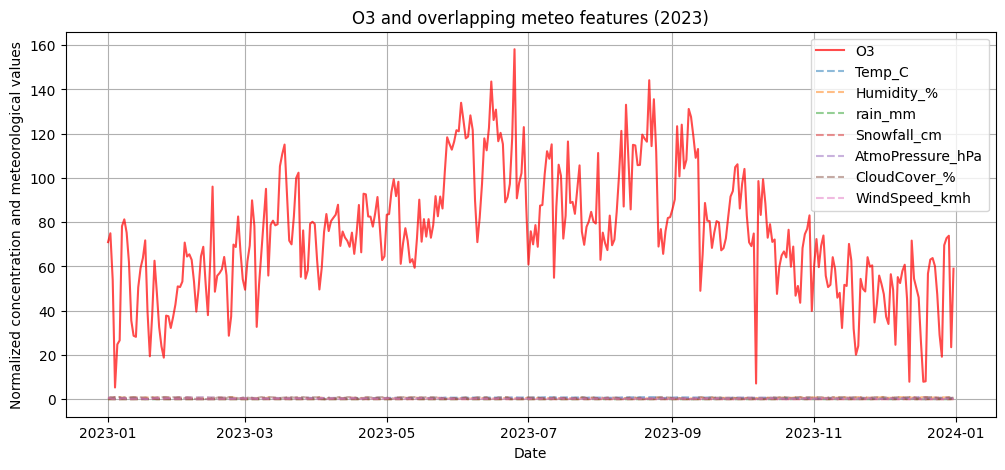

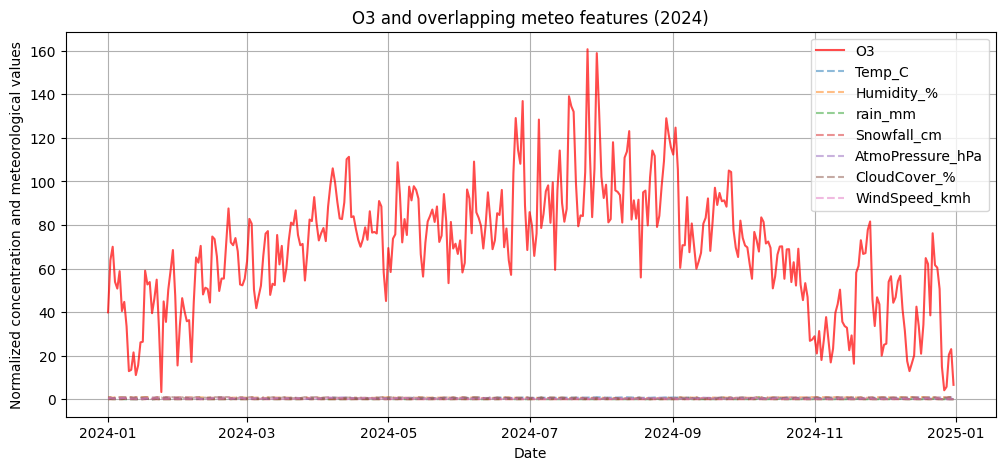

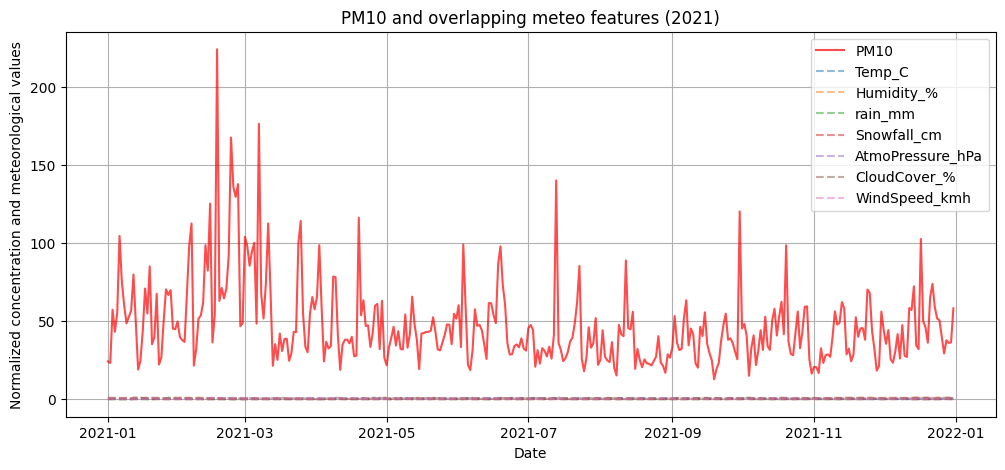

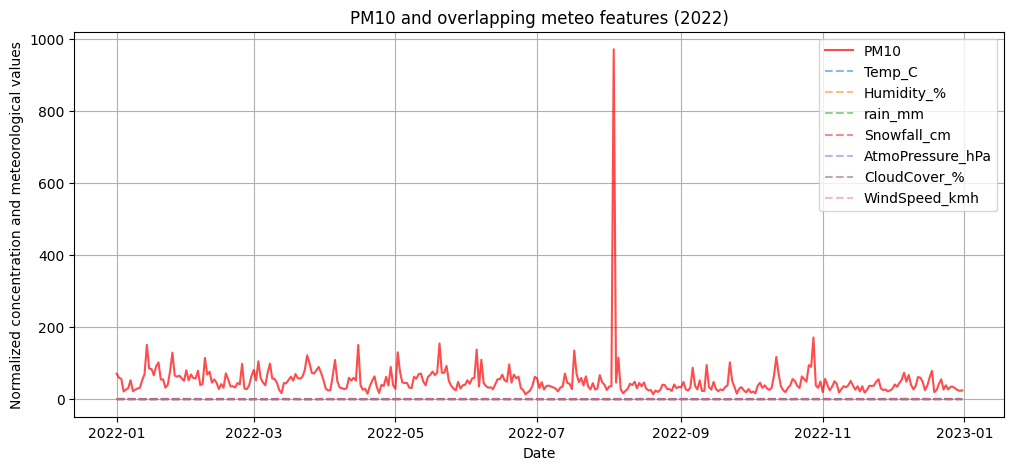

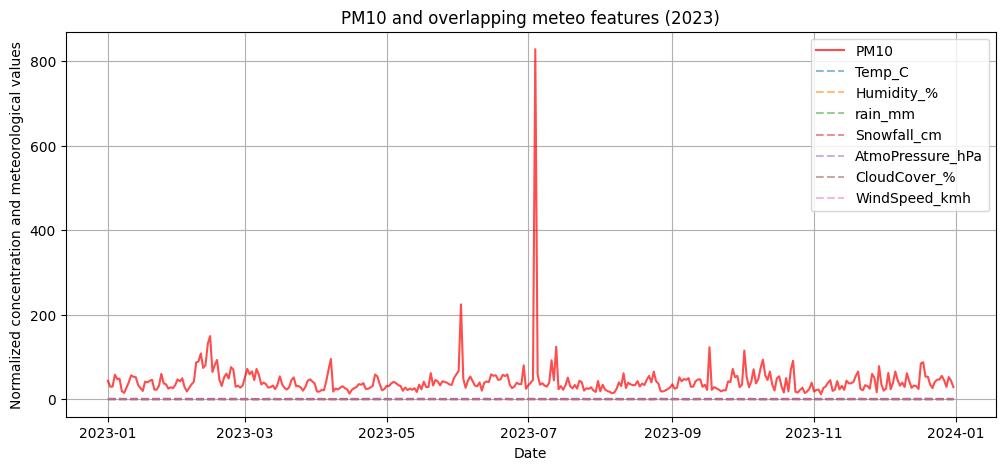

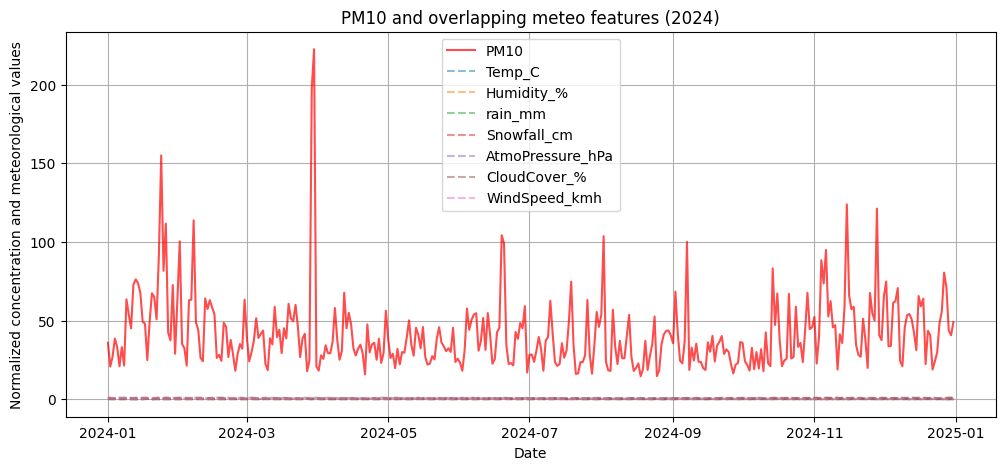

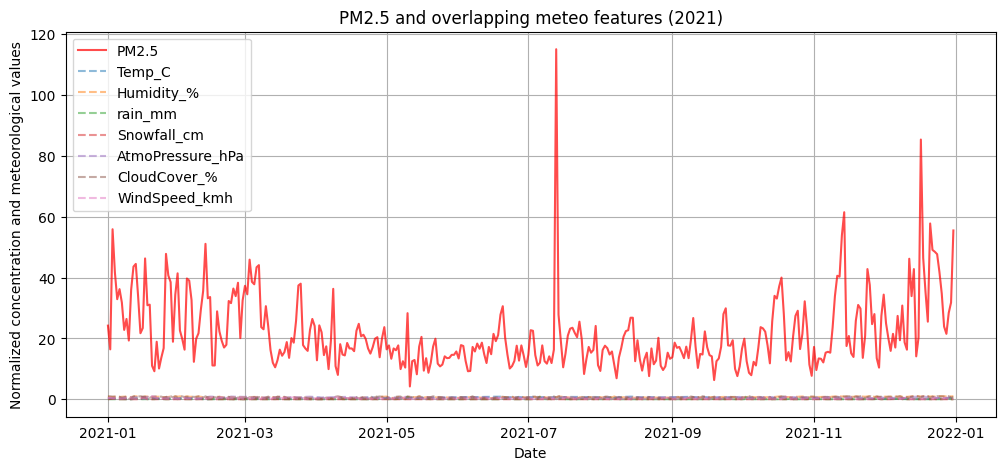

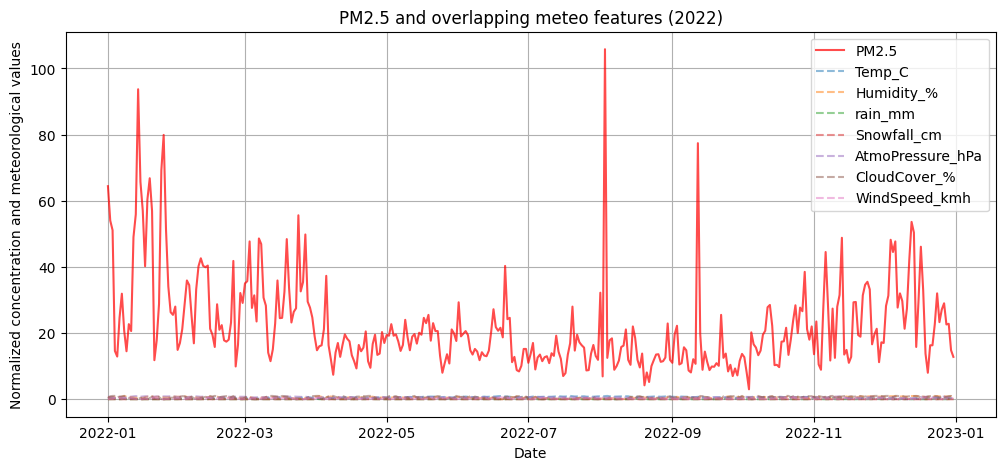

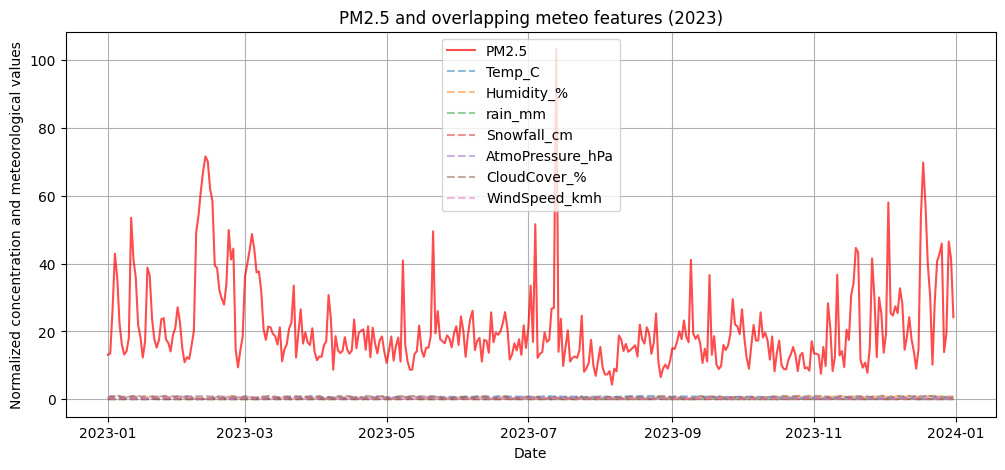

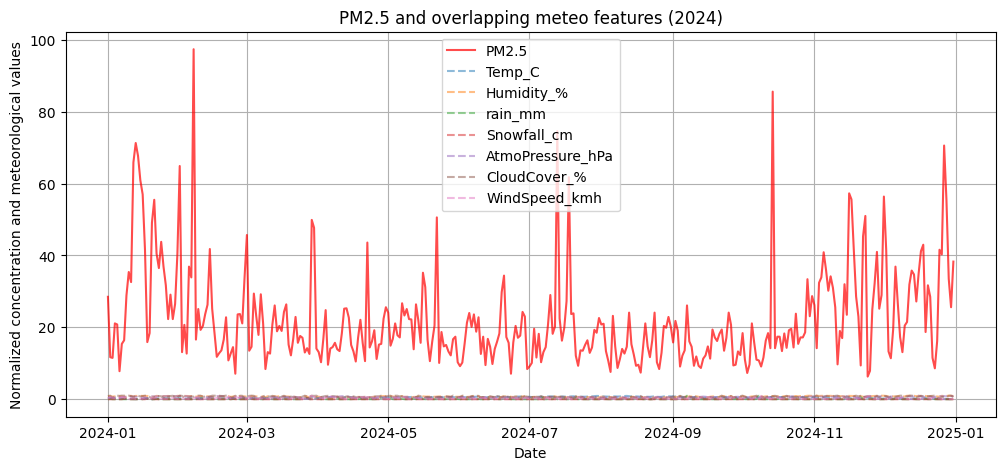

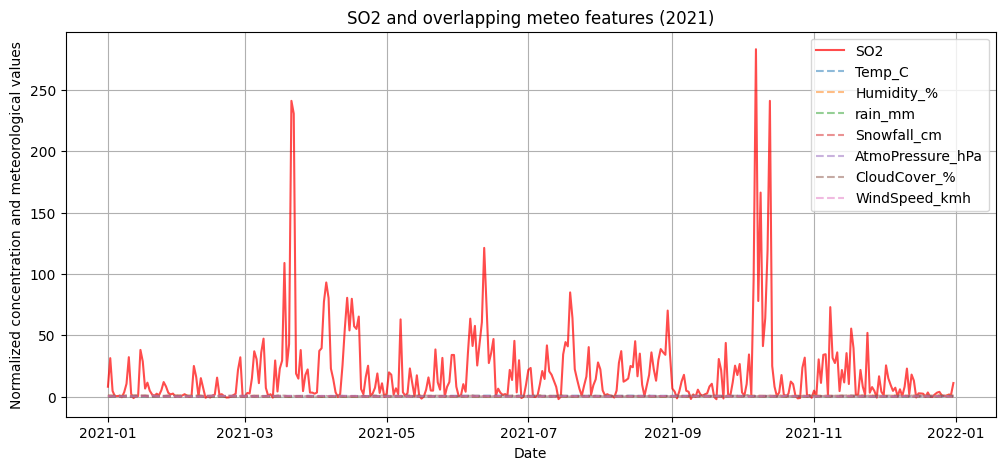

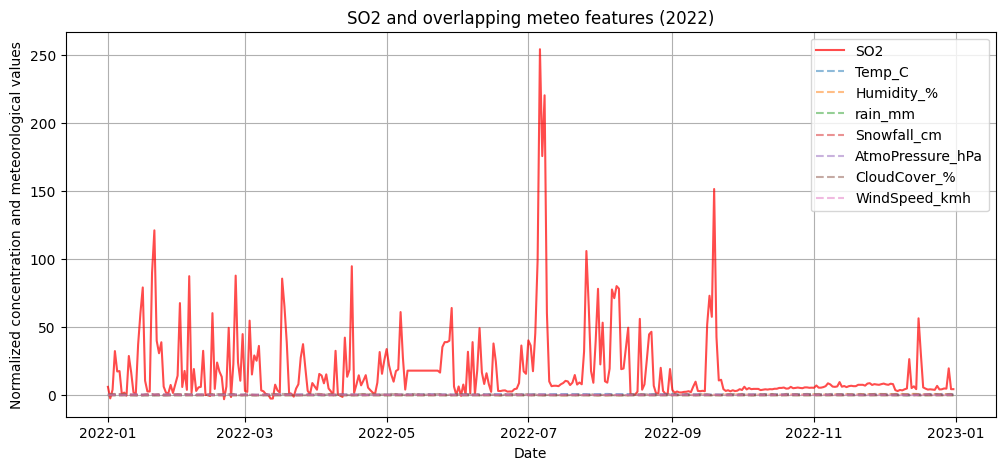

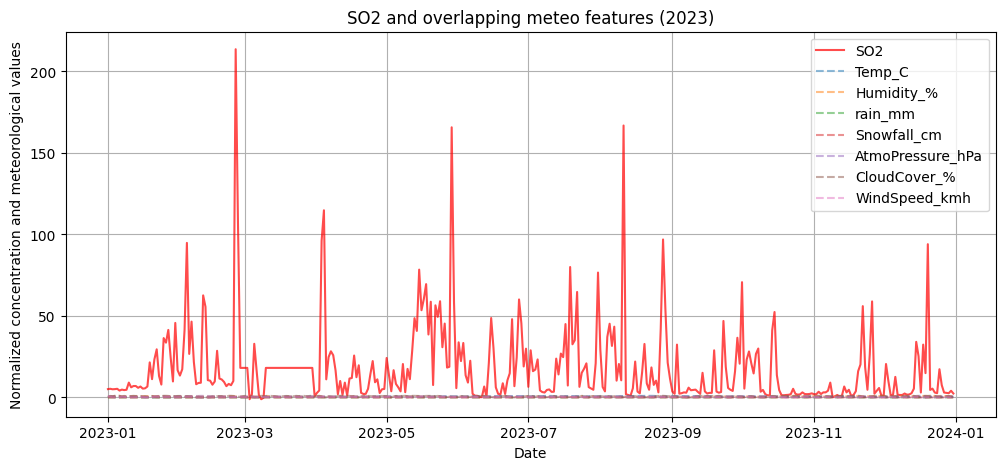

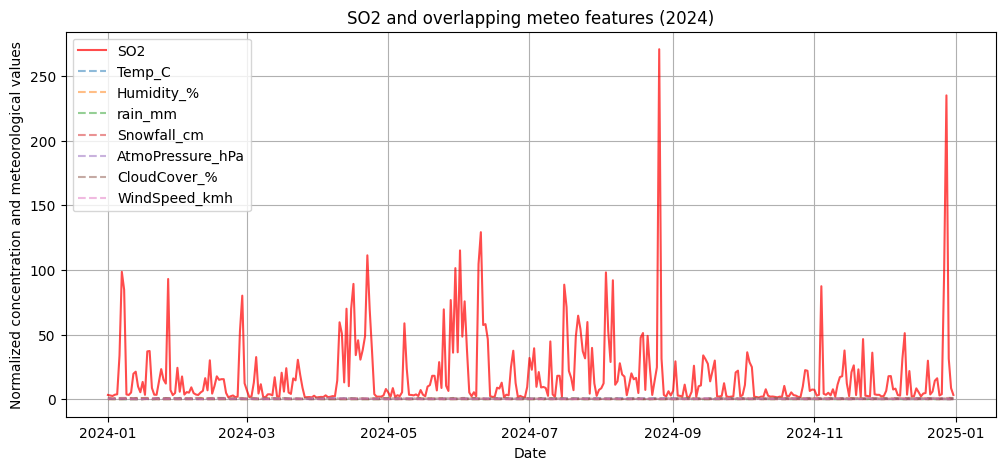

In [12]:
# var_meteo
# var_pol

# Adding a column "Year" to allow segmentation of data by years:
df_metePol['Year'] = df_metePol.index.year

# Normalizing meteo features to avoid big scale gaps:
scaler = MinMaxScaler()
df_metePol[var_meteo] = scaler.fit_transform(df_metePol[var_meteo])

# Create splitted graphs by year for each pollutant:
for pollutant in var_pol:
    for year in df_metePol['Year'].unique():
        df_year = df_metePol[df_metePol['Year'] == year]

        plt.figure(figsize=(12, 5))
        
        # Pollutant plot:
        plt.plot(df_year.index, df_year[pollutant], label=pollutant, color='red', alpha=0.7)
        
        # Normalized meteo features plot:
        for meteo in var_meteo:
            plt.plot(df_year.index, df_year[meteo], label=meteo, alpha=0.5, linestyle='dashed')
        
        plt.title(f"{pollutant} and overlapping meteo features ({year})")
        plt.xlabel("Date")
        plt.ylabel("Normalized concentration and meteorological values")
        plt.legend()
        plt.grid(True)
        plt.show()


In [15]:
# Novos limites diários da OMS para alertas
daily_limits_oms = {
    "PM2.5": 15,   # µg/m³ (24 horas)
    "PM10": 45,    # µg/m³ (24 horas)
    "O3": 100,     # µg/m³ (8 horas)
    "NO2": 25,     # µg/m³ (24 horas)
    "SO2": 40      # µg/m³ (24 horas)
}

# Atualizar colunas de alerta com os novos valores diários
for pollutant, limit in daily_limits_oms.items():
    df_metePol[f"Alerta_{pollutant}"] = df_metePol[pollutant] > limit

# Contar os dias com alertas baseados nos novos limites
alert_counts_daily = {pollutant: df_metePol[f"Alerta_{pollutant}"].sum() for pollutant in daily_limits_oms.keys()}

# Criar DataFrame com os resultados
alert_df_daily = pd.DataFrame.from_dict(alert_counts_daily, orient='index', columns=["Dias acima do limite"])

# Exibir os resultados atualizados
display(alert_df_daily)


Dias acima do limite
PM2.5                   959
PM10                    547
O3                      219
NO2                    1432
SO2                     180